In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
print(os.listdir('stack-overflow-developer-survey-2020'))

['README_2020.txt', 'so_survey_2020.pdf', 'survey_results_public.csv', 'survey_results_schema.csv']


Reading the CSV Files

In [3]:
survey_raw_df = pd.read_csv('stack-overflow-developer-survey-2020/survey_results_public.csv')

print("Data Set for public:\n", survey_raw_df, "\n")

print(survey_raw_df.columns, "\n")

Data Set for public:
        Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

     

In [4]:
schema_raw_df = pd.read_csv('stack-overflow-developer-survey-2020/survey_results_schema.csv', index_col='Column')
schema_series = schema_raw_df.QuestionText
print(schema_series) # we just need the Questions now, this would make a pandas SERIES which has 'Column' as index and coresponding QuestionText as Value 

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object


For an Example:

In [5]:
print(schema_series['YearsCodePro'], "\n")

NOT including education, how many years have you coded professionally (as a part of your work)? 



 Data Preparation & Cleaning 
  
  We will limit our survey analysis to the following areas:
   1) Demographics of the survey respondents & the Global programming community
   2) Distribution of programming skills, experiencing and preferences 
   3) Employment-related information, preferences, opinion

In [6]:
selected_columns = [ # Demographics
                    'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
                    
                    # programming Experience 
                    'Hobbyist', 
                    'Age1stCode',
                    'YearsCode',
                    'YearsCodePro',
                    'LanguageWorkedWith',
                    'LanguageDesireNextYear',
                    'NEWLearn', 
                    'NEWStuck', 
                    
                    # Employment
                    'Employment', 'DevType', 
                    'WorkWeekHrs', 'JobSat',
                    'JobFactors',  'NEWOvertime', 'NEWEdImpt'
                    ]

In [7]:
len(selected_columns)
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [8]:
survey_df = survey_raw_df[selected_columns].copy()

In [9]:
schema = schema_series[selected_columns]  # The Key-Value paired SERIES when passed with the selected_column gives the Index as the same, and the Question corresponding to it. 

In [10]:
print(survey_df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

While Working with more number of Datas, most of the Data type will be of type OBJECT. There would be no problem to work with the String Data Type, but we have to convert all the numbers associated column to numeric Data type for our analyisis purpose.

In [11]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

Here, we are using pd.numeric which is a Pandas function which converts these objects into NUMERIC values.

The errors="coerce" is introduced coz, there might be a possiblity that there are some words instead of numbers, which might throw error while converting. So, to avoid this error, we use this line which would change that string value to NAN value.

In [12]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce') 
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Now that we have converted the Required columns to numeric form, it would be easier for us to compute the trends of it and analyze.

In [13]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


While dealing with real world Datas we might encounter some unrealsistic Value Error, for eg., Age=1 or 279 in the data set we are using is very unrealistic. So, we have to ensure that these kind of error don't persist.

The simple case to handle these kind of error would be delete the Rows having age less than 10 and Age greter than 100. 

We can use the .drop() method to perform this opreation.

Another instance where this is happening is the WorkWeekHrs, where the Work hours exceeds 140hrs, work hrs could be 20hrs for a day.

In [14]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)

survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index ,inplace=True)

NOTE: The 'inplace=True' here helps to maintain the same dataframe by not creating a new dataframe with deleted Row.(Deletes the intended row and helps to maintain same DATAFRAME)

In [15]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

There are Cases in the GENDER where people have picked up multiple options.
So, to simplify the analysis, we are replacing those with NAN(Not A Number). 

.where() function keeps values that match the condition and replaces others with np.nan, which means we are selecting a row which does not contain ';' in Gender.

But we need to replace one with ';', so we use the Negation operation (~). Now this will replace the Rows having ';' as Gender into NAN.

inplace=True, Modifies it directly to the same data frame.

In [16]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

Now, We have Cleaned up our Data, it can be used for our analysis. We can now check random samples from the Data Frame by using the .sample() function, this would give random number of samples with the count of argument given to it. 

In [17]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
22738,Bangladesh,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A business discipline (such as accounting, fin...",Yes,17.0,4.0,2.0,HTML/CSS;JavaScript;PHP;SQL,Dart;HTML/CSS;JavaScript;PHP;SQL,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",48.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
60770,United States,NaN,NaN,"Associate degree (A.A., A.S., etc.)","Another engineering discipline (such as civil,...",Yes,12.0,9.0,6.0,Bash/Shell/PowerShell;Go;Julia;Python;Scala,C;Go;Haskell;Kotlin;Rust,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end",NaN,Neither satisfied nor dissatisfied,Industry that I’d be working in,NaN,Somewhat important
23427,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,10.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C#;Kotlin;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Slightly satisfied,Office environment or company culture,Sometimes: 1-2 days per month but less than we...,Very important
18740,United Kingdom,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,10.0,27.0,15.0,C#;SQL;VBA,C#;Python;R;SQL;TypeScript,Once a year,Play games;Visit Stack Overflow;Panic;Watch he...,Employed full-time,Data or business analyst;Database administrato...,45.0,Very satisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Somewhat important
21175,Philippines,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,18.0,5.0,1.0,C#;HTML/CSS;Java;JavaScript;PHP,C#;HTML/CSS;Java;JavaScript;PHP,Every few months,Play games;Visit Stack Overflow;Watch help / t...,Employed full-time,"Developer, full-stack",NaN,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Not at all important/not necessary


EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS

We have to understand the Demographics(eg., age, country, gender, etc.) of the respondents looks like. It's important to explore these variables in order to understand the distribution of the programmers across the globe.

In [18]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

COUNTRY

We would first look at number of countries from which there are responses in this given survey, and plot the 10 countries with the highest number of repsonses. 

In [19]:
schema.Country

'Where do you live?'

In below used snippet, the "nunique()" function counts the number of unique values the selected column of the DATA FRAME

In [20]:
survey_df.Country.nunique()

183

We can identify the countries with highest number of respondents using the value_counts method

In [21]:
top_countries = survey_df.Country.value_counts().head(15)


Using BARCHART to visulaize the top countries.

<Axes: title={'center': 'Where do you live?'}, xlabel='Country', ylabel='count'>

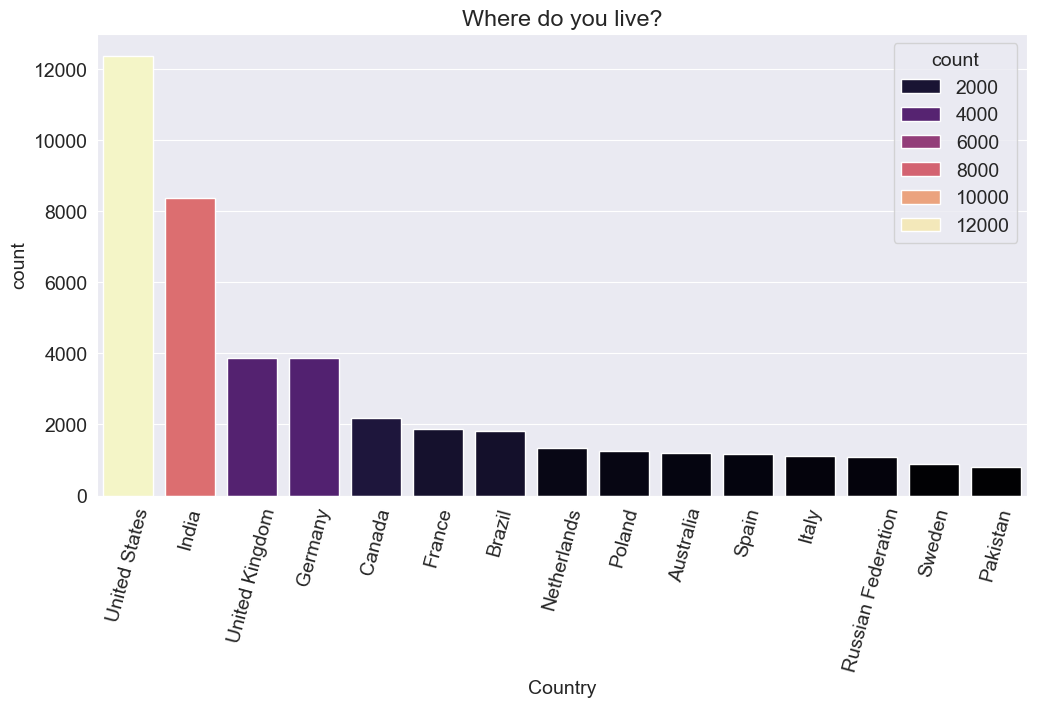

In [22]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries, hue=top_countries ,palette='magma')

In [23]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75.]),
 <BarContainer object of 13 artists>)

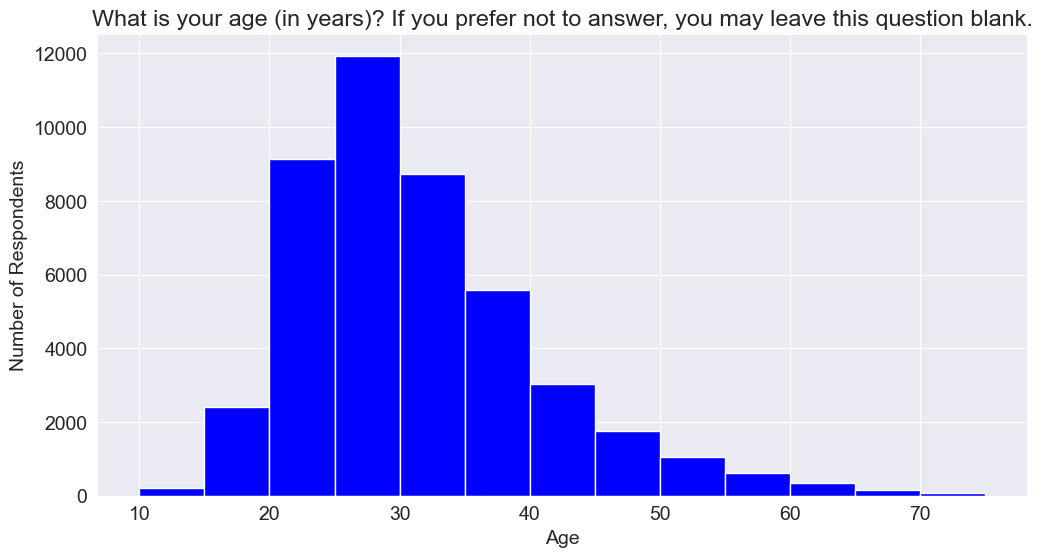

In [24]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.hist(survey_df.Age, bins=np.arange(10, 80, 5), color='blue')

Creating an query of own, where we group the Age. So, we would prefer to make an Copy of the existing Data frame and do this analysis with the created alias.

In [25]:
survey_df_alias = survey_df.copy()
survey_df_alias

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
def age_category(age):
  if age < 10:
    return 'Less than 10 years'
  elif age < 18:
    return '10 - 18 years'
  elif age < 30:
    return '18 - 30 years'
  elif age < 45:
    return '30 - 45 years'
  elif age < 60:
    return '45 - 60 years'
  else:
    return 'Older than 60 years'
  
survey_df_alias['AgeGroup'] = survey_df_alias['Age'].apply(age_category)

survey_df_alias

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,AgeGroup
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Older than 60 years
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,Older than 60 years
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older than 60 years
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,18 - 30 years
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,30 - 45 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,...,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important,Older than 60 years
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Older than 60 years
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Older than 60 years
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,...,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,Older than 60 years


<Axes: title={'center': 'Different Age Group trends'}, xlabel='Age groups', ylabel='Number of Respondents'>

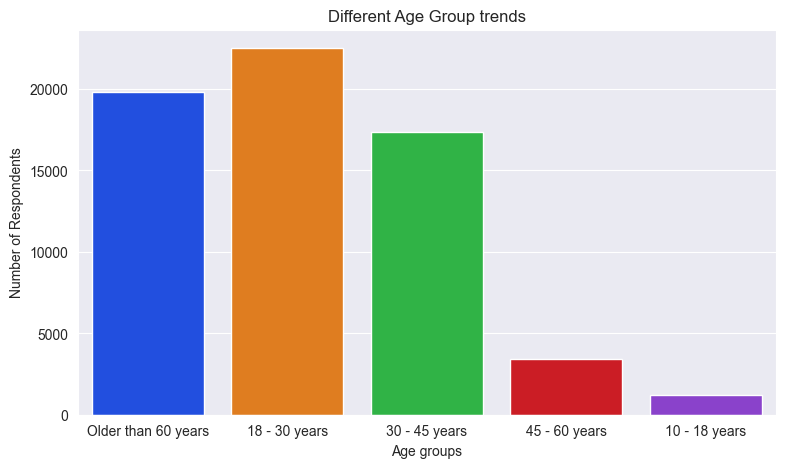

In [27]:
plt.figure(figsize=(9, 5))
matplotlib.rcParams['font.size'] = 10
plt.title("Different Age Group trends")
plt.xlabel("Age groups")
plt.ylabel("Number of Respondents")
# age_group_counts = survey_df_alias['AgeGroup'].value_counts()
# plt.bar(age_group_counts.index, age_group_counts.values)
sns.countplot(x=survey_df_alias['AgeGroup'], hue=survey_df_alias['AgeGroup'], palette='bright')

GENDER
 
Looking at the Distribution of GENDER. It's a well known fact that women and non-binary genders are underrepresented in the programming Community, so we might exppect to see a skewed distribution here.

In [28]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

Here, the dropna=False, returns that how many people have chosen nothing (NAN value)

In [29]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Gender
Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ce69cf5550>,
 [Text(-0.684247053664357, 0.8612815855175627, 'Man'),
  Text(0.4934476089566868, -0.9831121285056598, 'nan'),
  Text(1.0722804880708616, -0.24538654181212718, 'Woman'),
  Text(1.0998054245989355, -0.020688838119999744, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(-0.3732256656351038, 0.46978995573685234, '71.4%'),
  Text(0.2691532412491019, -0.5362429791849053, '22.1%'),
  Text(0.58488026622047, -0.13384720462479663, '6.0%'),
  Text(0.5998938679630557, -0.011284820792727133, '0.6%')])

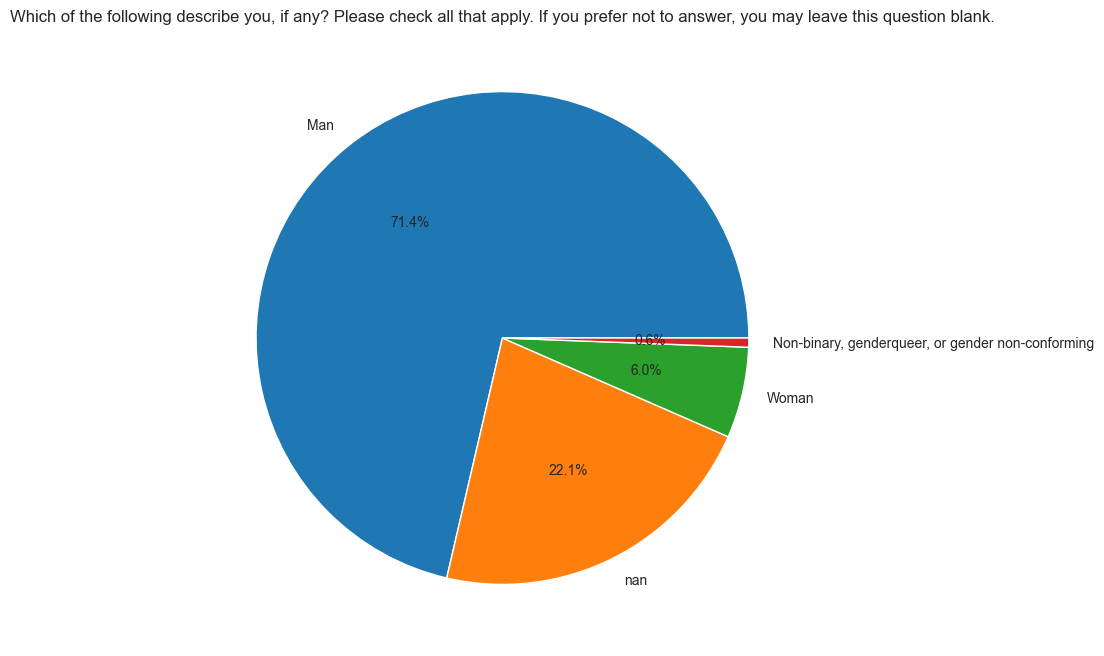

In [30]:
plt.figure(figsize=(16, 8))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

EDUCATION LEVEL

Now, we would be visualising the Education level to see what are the different types of degrees the respondents hold across the world. 

In [31]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

<Axes: title={'center': 'Which of the following best describes the highest level of formal education that you’ve completed?'}, xlabel='count', ylabel='EdLevel'>

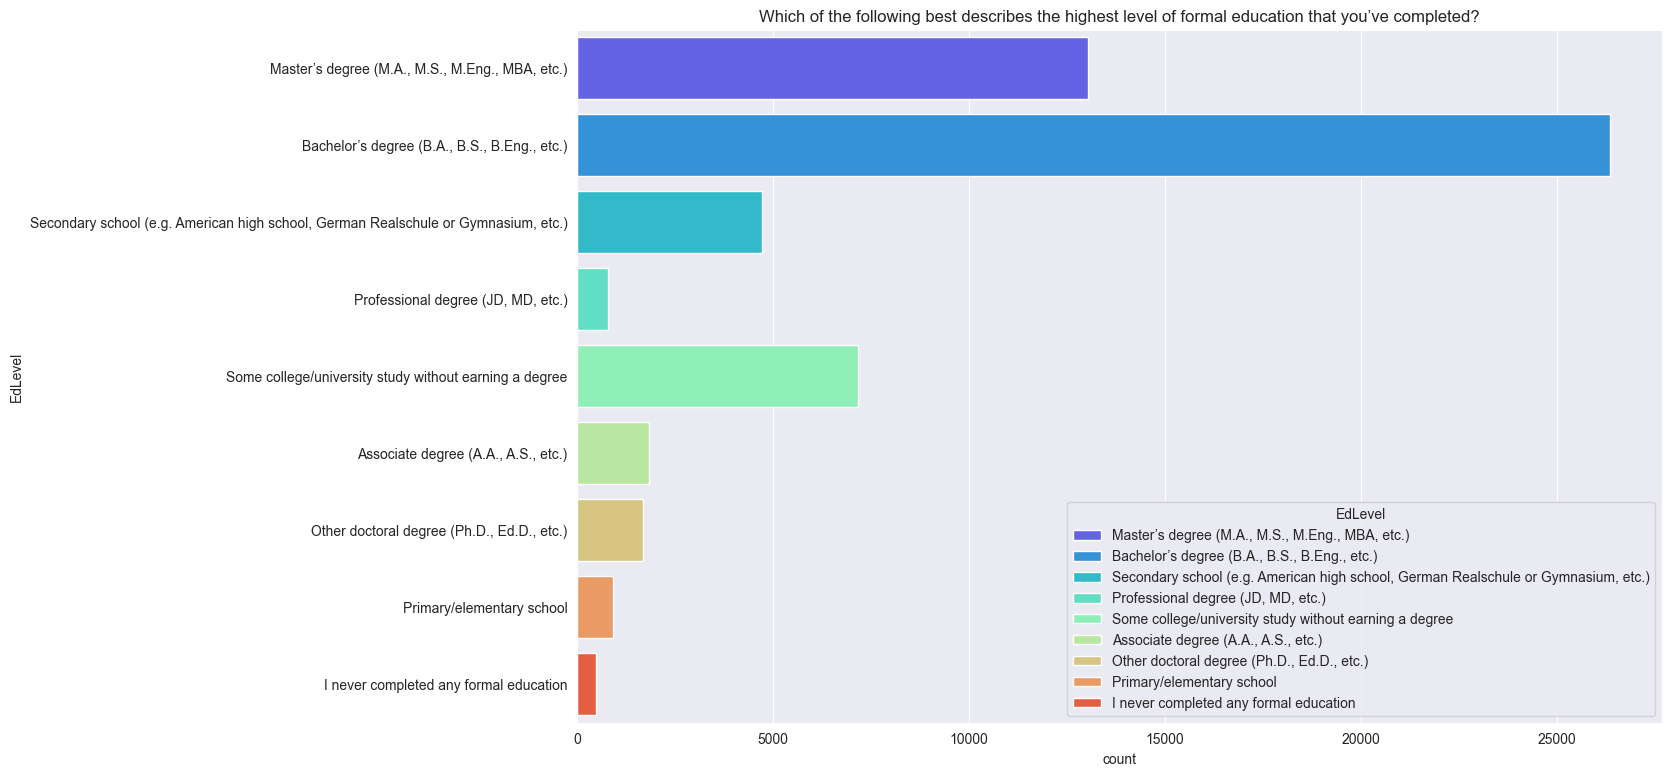

In [32]:
plt.figure(figsize=(14, 9))
plt.title(schema.EdLevel)
# plt.xticks(rotation=75, fontsize=12)
sns.countplot(y=survey_df['EdLevel'], hue=survey_df['EdLevel'], palette='rainbow')


We want to calculate percentage of people who have completed the respective Degrees. So, we use a PIE Chart to do that work. 😜

([<matplotlib.patches.Wedge at 0x1ce6a210190>,
 [Text(0.12915336672245387, 1.0923916000520397, 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
  Text(-0.9743201277680807, -0.5105881790895586, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
  Text(0.027379797373299035, -1.0996591957037405, 'Some college/university study without earning a degree'),
  Text(0.6919046405514355, -0.8551420749696445, 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'),
  Text(0.9495760866178, -0.555252425229845, 'Associate degree (A.A., A.S., etc.)'),
  Text(1.038673817821326, -0.3621556297677442, 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
  Text(1.079872851118731, -0.20946270650572382, 'Primary/elementary school'),
  Text(1.09486638178098, -0.10614898042763043, 'Professional degree (JD, MD, etc.)'),
  Text(1.0996148391799598, -0.029106793970329795, 'I never completed any formal education')],
 [Text(0.07044729093952029, 0.5958499636647488, '46.254%'),
  Text(-0.53144

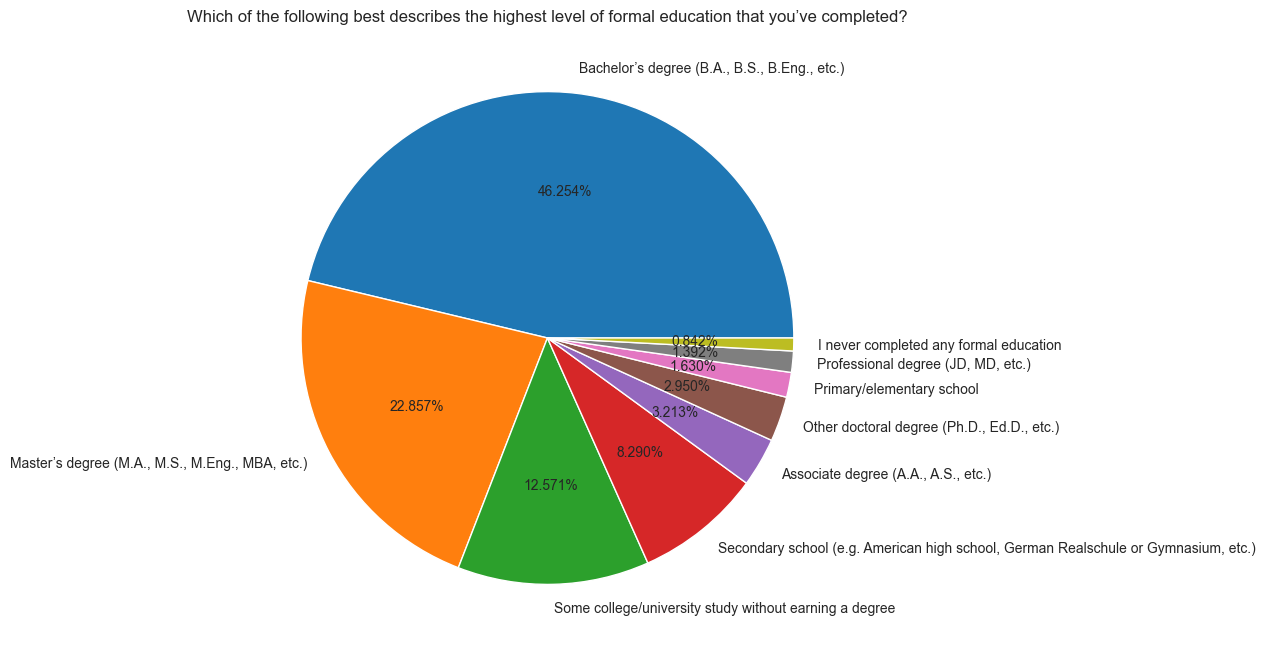

In [33]:
Edlevel_counts = survey_df.EdLevel.value_counts()
plt.figure(figsize=(12, 8))
plt.title(schema.EdLevel)
plt.pie(Edlevel_counts, labels=Edlevel_counts.index, autopct='%1.3f%%')

Let's also plot the Undergraduate majors, but this time we'll convert the numbers into percentages, and sort by percentage values to make it easier to visualise the order. 

In [34]:
schema.UndergradMajor

'What was your primary field of study?'

C:\Users\harik\AppData\Local\Temp\ipykernel_14304\2521198418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=undergrad_percent.index, y=undergrad_percent, palette='coolwarm')


Text(0, 0.5, 'percentage(%) of repondents opted for respective degrees.')

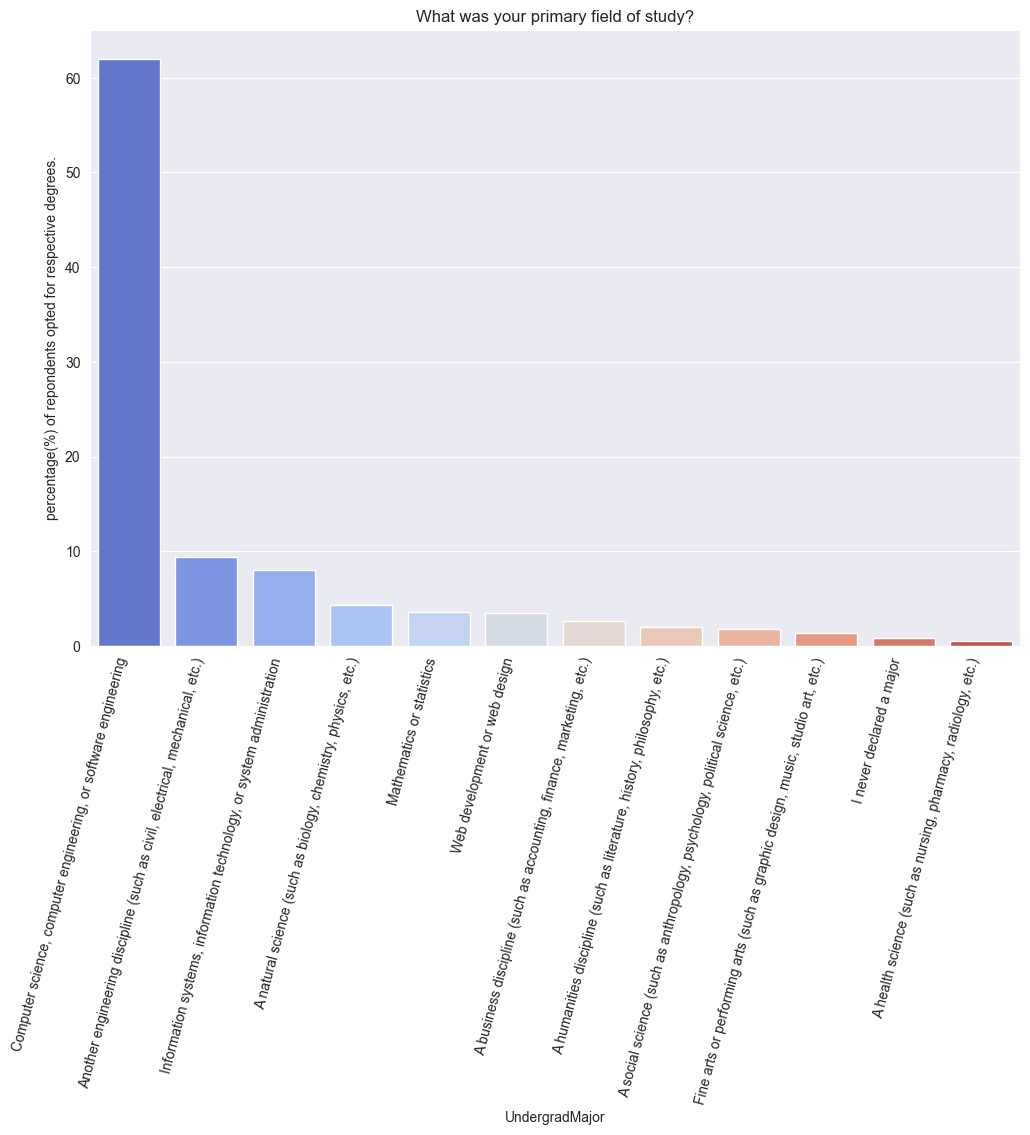

In [35]:
undergrad_percent = (survey_df.UndergradMajor.value_counts() / survey_df.UndergradMajor.count()) * 100
undergrad_percent

sns.barplot(x=undergrad_percent.index, y=undergrad_percent, palette='coolwarm')
plt.title(schema.UndergradMajor)
plt.xticks(rotation=75, fontsize=10, ha='right')
plt.ylabel("percentage(%) of repondents opted for respective degrees.")

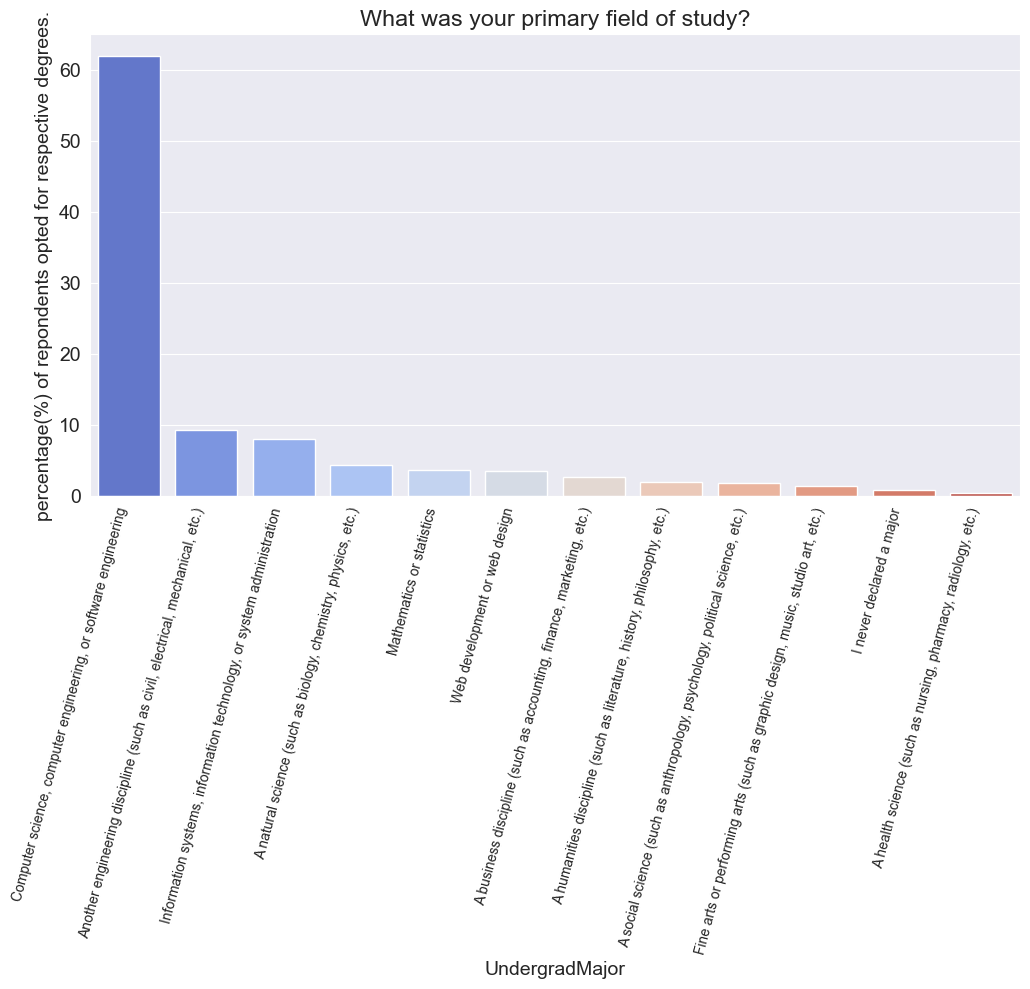

A Good Observation from the Visual is that, you don't need to be a Computer Science Major to be a good programmer. This could be seen as a good sign as the world wide comminuity of programming comprises of diverse graduates. 

In [36]:
new_EdImp_count = survey_df.NEWEdImpt.value_counts(dropna=False)
new_EdImp_count

NEWEdImpt
NaN                                   16214
Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: count, dtype: int64

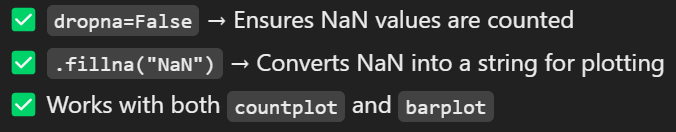


For this below analysis we could see that repondents who have responded with NAN values are not included in the Visualization, as PANDAS by default ignore this. So, we explicitly fill the ROWS of this column with NAN value to 'Not Important'. For this we'd be using the .fillna("Not Important") function. The argument could be any string which is to be introduced. 

<Axes: title={'center': 'How important is a formal education, such as a university degree in computer science, to your career?'}, xlabel='Importance of New Education', ylabel='Number of Respondents'>

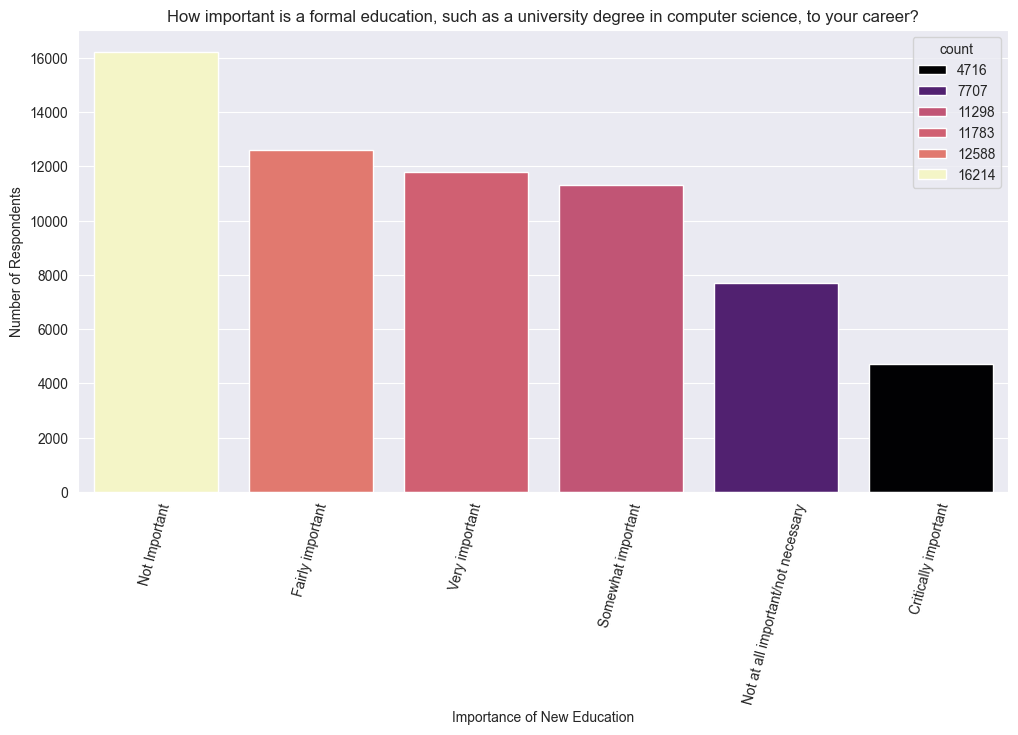

In [37]:
plt.figure(figsize=(12, 6))
plt.title(schema.NEWEdImpt)
plt.xlabel("Importance of New Education")
plt.xticks(rotation=75)
plt.ylabel("Number of Respondents")
# sns.countplot(x=survey_df['NEWEdImpt'], hue=survey_df['NEWEdImpt'], palette='magma')
sns.barplot(x=new_EdImp_count.index.fillna("Not Important"), y=new_EdImp_count, hue=new_EdImp_count, palette='magma')

EMPLOYMENT

Freelancing or the Contract based work is a common choice among the programmers, so it would be interesting to compare the breakdown between full time, Part time and Freelance work.

We would use the Employement column to do so.

In [38]:
schema.Employment

'Which of the following best describes your current employment status?'

In [39]:
employment_Count = survey_df.Employment.value_counts(dropna=False)
employment_Count

percent_emp = (employment_Count / survey_df.Employment.count()) * 100
percent_emp

Employment
Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
NaN                                                      1.438622
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: count, dtype: float64

Number of people Employed

<Axes: xlabel='Employement Status', ylabel='Number of Respondents to the Survey'>

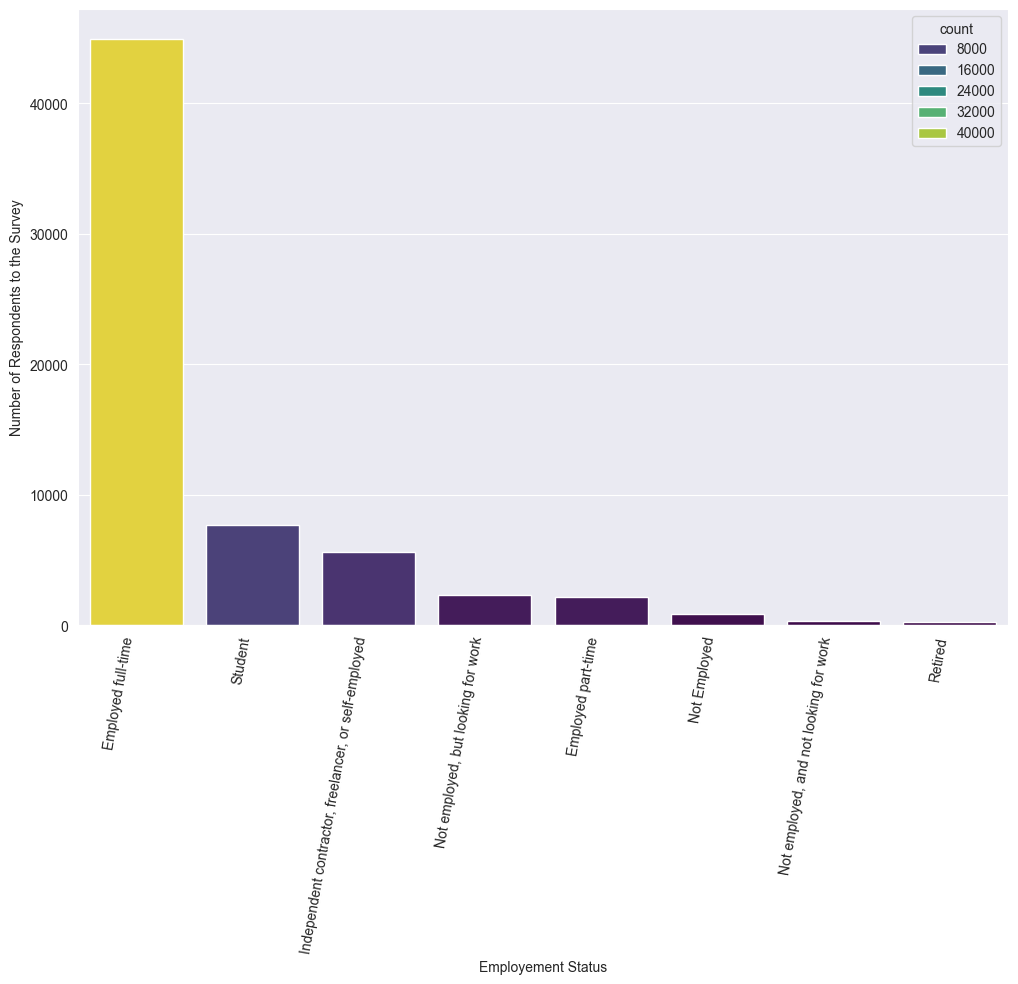

In [40]:
plt.xlabel("Employement Status")
plt.ylabel("Number of Respondents to the Survey")
plt.xticks(rotation=80, ha='right')
sns.barplot(x=employment_Count.index.fillna("Not Employed"), y=employment_Count, hue=employment_Count, palette='viridis')


Percentage of People Employed

<Axes: xlabel='Employement Status', ylabel='Percentage of people Employed'>

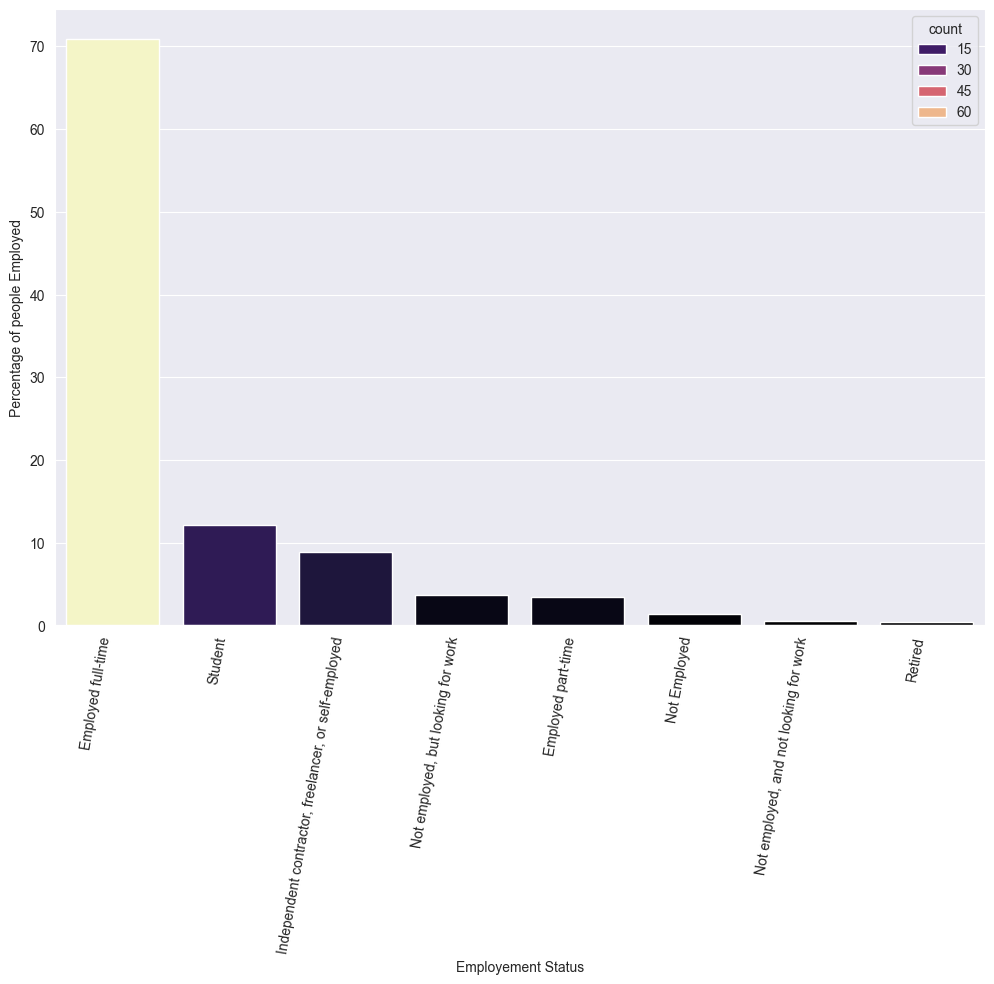

In [41]:
plt.xlabel("Employement Status")
plt.ylabel("Percentage of people Employed")
plt.xticks(rotation=80, ha='right')
sns.barplot(x=employment_Count.index.fillna("Not Employed"), y=percent_emp, hue=percent_emp, palette='magma')

From the above plot, it seems like about 10 percent of the Respondents are Part time employed or else Free lancers.



In [42]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                          4396
Developer, back-end                                                                                                                                                                            3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                 2214
Developer, back-end;Developer, full-stack                                                                                                                                                      1465
Developer, front-end                                                                                                                                                                           1390
            

DEVELOPER'S TYPE

We would analyse from the graphical visualizations what kind of development role people are mostly opting for and which field has more number of people.

NOTE: The "survey_df.DevType" has multiple answers for a single row, so it would be better to convert this pandas series into Data frame and Visualize it.(One column each for multiple options)

Here we would create a function to do that task. 

In [43]:
def seriesToDataframe(col_series):
    result_df = col_series.to_frame()
    options = []

    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False

            result_df.at[idx, option] = True
    return result_df[options]


In [44]:
dev_type_df = seriesToDataframe(survey_df.DevType)
dev_type_df.value_counts()

Developer, desktop or enterprise applications  Developer, full-stack  Developer, mobile  Designer  Developer, front-end  Developer, back-end  Developer, QA or test  DevOps specialist  Developer, game or graphics  Database administrator  Developer, embedded applications or devices  Engineer, data  Educator  System administrator  Engineering manager  Product manager  Data or business analyst  Academic researcher  Data scientist or machine learning specialist  Scientist  Senior executive/VP  Engineer, site reliability  Marketing or sales professional
False                                          False                  False              False     False                 False                False                  False              False                        False                   False                                        False           False     False                 False                False            False                     False                False                          

The dev_type_df has one column for each option that can be seleted as a response. If a respondent has selected the option, the value in the column is True, Otherwise False.

We can now use the column-wise totals to identify the most common roles. 

.sum() -> function

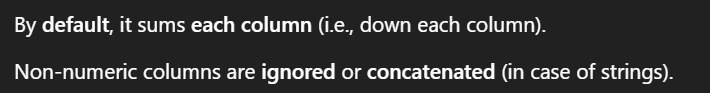

In [45]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

Hmmm... Some additional insights which could be added.
1) Percentage of respondents work in roles related to data science. (Since we are working in this particular field 😉)
2) Which role has the Highest percentage of women ?


Note: Since, we don't have any common column for the original dataframe and the newly created developers type data frame we cannot use the pd.merge() function, so we would use pd.concat() with axis=1, so that we are able to join it side by side. axis=0 would yield stacked dataframe. 

In [46]:
dev_type_df # This is just for reference. 

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
len(survey_df_alias)

64306

In [48]:
survey_df_alias = pd.concat([survey_df_alias, dev_type_df], axis=1)
survey_df_alias.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'AgeGroup',
       'Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', 'Designer',
       'Developer, front-end', 'Developer, back-end', 'Developer, QA or test',
       'DevOps specialist', 'Developer, game or graphics',
       'Database administrator', 'Developer, embedded applications or devices',
       'Engineer, data', 'Educator', 'System administrator',
       'Engineering manager', 'Product manager', 'Data or business analyst',
       'Academic researcher', 'Data scientist or machine learning specialist',
       'Scientist', 'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or sales professional'],
     

In [49]:
percent_dataSci = (survey_df_alias['Data scientist or machine learning specialist'].sum() / len(survey_df_alias)) * 100
print(f"{percent_dataSci:.3f} % of respondents are working in Data Science and Machine learning role.")

6.125 % of respondents are working in Data Science and Machine learning role.


In [50]:
# Highest Percentage of Women in a given field

women_df = survey_df_alias[survey_df_alias['Gender'] == 'Woman']

role_columns = [col for col in survey_df_alias.columns 
                if survey_df_alias[col].dtype == 'bool']  # this will filter out the columns which has only the boolean operation. 

role_women_counts = women_df[role_columns].sum()

total_women = women_df.Gender.count()

role_women_counts.sort_values(ascending=False)

Percent_Women = role_women_counts.sort_values(ascending=False) / total_women * 100

print(f"The following role has the highest percentage of women '{Percent_Women}'")

The following role has the highest percentage of women 'Developer, full-stack                            38.487614
Developer, back-end                              34.654498
Developer, front-end                             31.186441
Developer, mobile                                11.942634
Developer, desktop or enterprise applications    11.290743
Designer                                          8.683181
Data scientist or machine learning specialist     7.979140
Data or business analyst                          7.353325
Developer, QA or test                             6.544980
Database administrator                            5.788787
Academic researcher                               5.554107
Engineer, data                                    4.850065
Educator                                          4.641460
DevOps specialist                                 4.015645
Developer, embedded applications or devices       3.989570
System administrator                              3.572360


C:\Users\harik\AppData\Local\Temp\ipykernel_14304\2020815232.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dev_type_df.columns, y=dev_type_totals, palette="magma")
C:\Users\harik\AppData\Local\Temp\ipykernel_14304\2020815232.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Percent_Women.index, y=Percent_Women, palette='coolwarm')


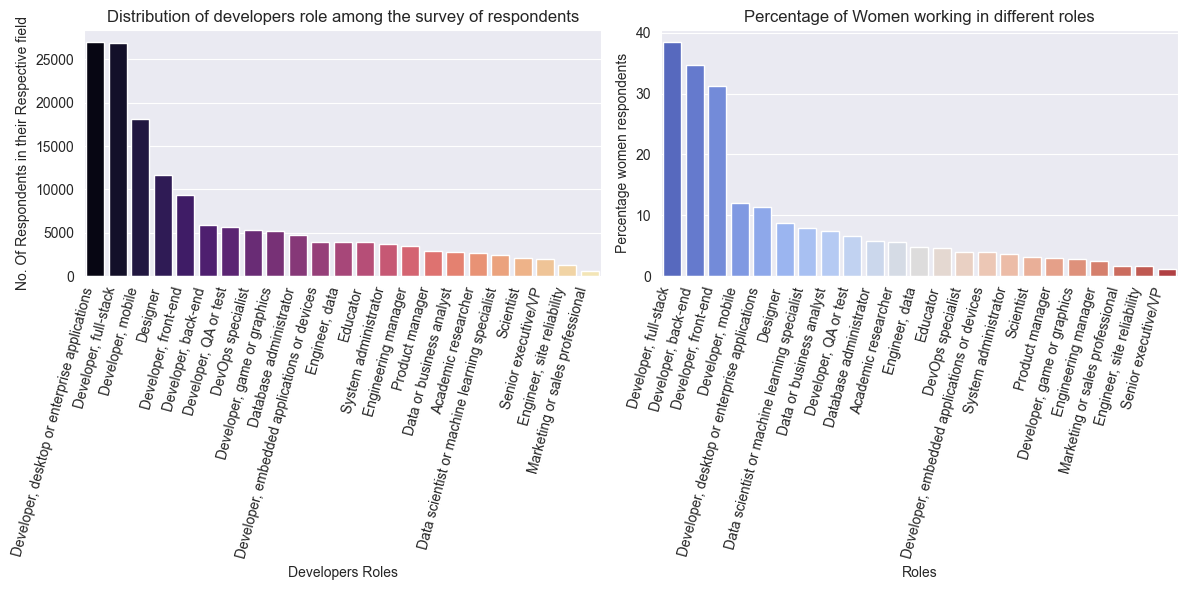

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.xlabel('Developers Roles')
plt.ylabel('No. Of Respondents in their Respective field')
plt.xticks(rotation=75, ha='right')
plt.title('Distribution of developers role among the survey of respondents')
sns.barplot(x=dev_type_df.columns, y=dev_type_totals, palette="magma")

plt.subplot(1, 2, 2)
plt.title("Percentage of Women working in different roles")
plt.xlabel("Roles")
plt.ylabel("Percentage women respondents")
plt.xticks(rotation=75, ha='right')
sns.barplot(x=Percent_Women.index, y=Percent_Women, palette='coolwarm')
plt.tight_layout()
plt.show()

**Asking and Answering**

Since all the insights have been gained from exploring the Data already. Let us ask some specific questions based on the above analysis.

**Q: Which were the most popular programming languages in 2020 ?**

To answer, this we can use teh "LanguageWorkedWith" column. Similar to "DevType" respondents were allowed to choose multiple options here. 

In [52]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

Since, this particular column of the survey Dataframe has multiple options (just like, DevType Column), we would convert this into multiple column making it as a new Dataframe. 

Here, we would again use the Helper function seriesToDataframe()

In [53]:
languages_worked_df = seriesToDataframe(survey_df.LanguageWorkedWith)

In [54]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
languages_worked_df.sum().sort_values(ascending=False)

JavaScript               38515
HTML/CSS                 35884
SQL                      31153
Python                   25080
Java                     22905
Bash/Shell/PowerShell    18803
C#                       17879
PHP                      14874
TypeScript               14444
C++                      13578
C                        12370
Go                        4989
Kotlin                    4429
Ruby                      4006
Assembly                  3503
VBA                       3469
Swift                     3361
R                         3257
Rust                      2893
Objective-C               2317
Dart                      2262
Scala                     2026
Perl                      1773
Haskell                   1197
Julia                      503
dtype: int64

We would take mean of those columns, since we only have number of "True" and "False", mean would be, total number of ones over the total columns present. (Kind off Weighted average)

In [56]:
languages_worked_percentage = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentage =  np.round(languages_worked_percentage, 3)
print(f"Percentage of survey respondents worked in a particular language: \n{languages_worked_percentage}")

Percentage of survey respondents worked in a particular language: 
JavaScript               59.893
HTML/CSS                 55.802
SQL                      48.445
Python                   39.001
Java                     35.619
Bash/Shell/PowerShell    29.240
C#                       27.803
PHP                      23.130
TypeScript               22.461
C++                      21.115
C                        19.236
Go                        7.758
Kotlin                    6.887
Ruby                      6.230
Assembly                  5.447
VBA                       5.395
Swift                     5.227
R                         5.065
Rust                      4.499
Objective-C               3.603
Dart                      3.518
Scala                     3.151
Perl                      2.757
Haskell                   1.861
Julia                     0.782
dtype: float64


<Axes: title={'center': 'Popular programming languages used by people across the Globle'}, xlabel='Programming Languages worked with', ylabel='Percentage of Respondents'>

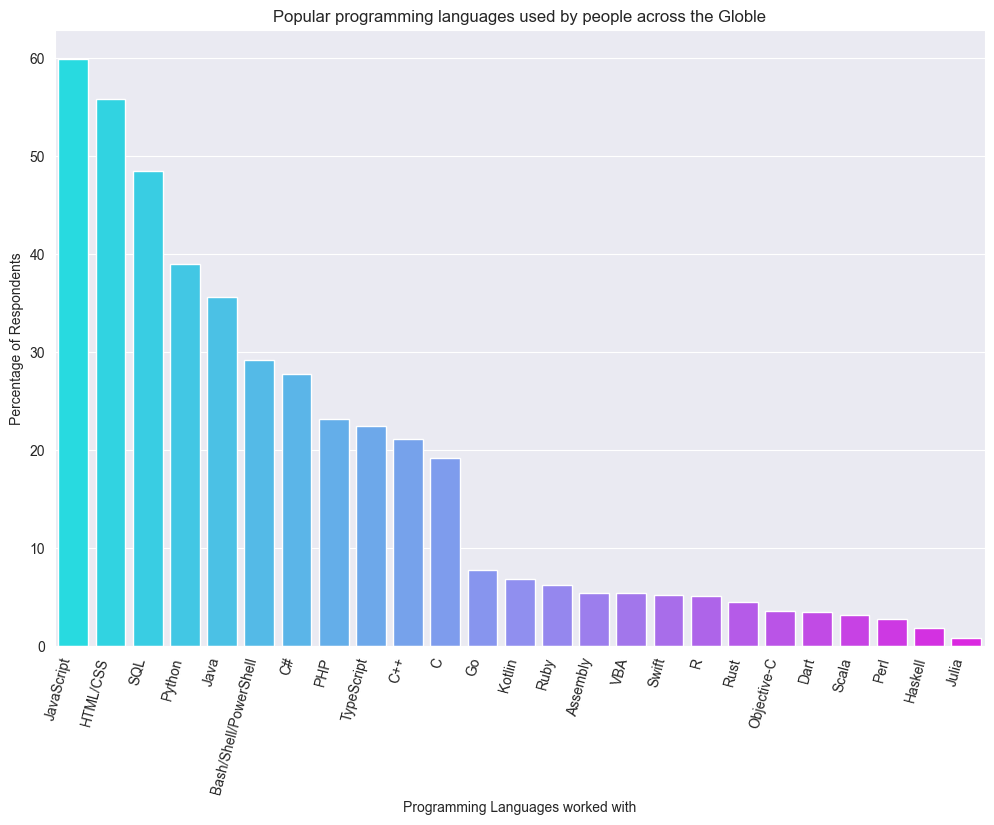

In [57]:
plt.title("Popular programming languages used by people across the Globle")
plt.xlabel("Programming Languages worked with")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=75, ha='right')
sns.barplot(x=languages_worked_percentage.index, y=languages_worked_percentage, hue=languages_worked_percentage.index, palette='cool')

In [58]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

Okay, so this is the column similar to Languages people have worked with. Here people would choose the options regarding their next choice of learning a new language.... Interesting 

We will now try to have a insight on what new language(s) do the respondents wants to learn in the succesive year(s). 

In [59]:
schema.LanguageDesireNextYear 

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [60]:
survey_df.LanguageDesireNextYear

0                                   C#;HTML/CSS;JavaScript
1                                             Python;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                          Java;Ruby;Scala
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 64306, dtype: object

In [61]:
language_desireNxt_df = seriesToDataframe(survey_df.LanguageDesireNextYear)
language_desireNxt_df

,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,PHP,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We have boolean values here in each column which calculates the weighted average. So, when we multiply it with hundred, we get the percentage of repondents opted for that particular languages. 

In [62]:
language_to_learn = language_desireNxt_df.mean().sort_values(ascending=False) * 100 
language_to_learn = np.round(language_to_learn, 3)
language_to_learn

Python                   41.144
JavaScript               40.425
HTML/CSS                 32.028
SQL                      30.800
TypeScript               26.452
C#                       21.059
Java                     20.465
Go                       19.432
Bash/Shell/PowerShell    18.057
Rust                     16.271
C++                      15.014
Kotlin                   14.761
PHP                      10.948
C                         9.360
Swift                     8.693
Dart                      7.309
R                         6.572
Ruby                      6.426
Scala                     5.326
Haskell                   4.594
Assembly                  3.766
Julia                     2.541
Objective-C               2.339
Perl                      1.762
VBA                       1.611
dtype: float64

<Axes: title={'center': 'Programming language in which the Respondents want to work over the years'}, xlabel='Programming languages to be learn', ylabel='Percentage of Respondents'>

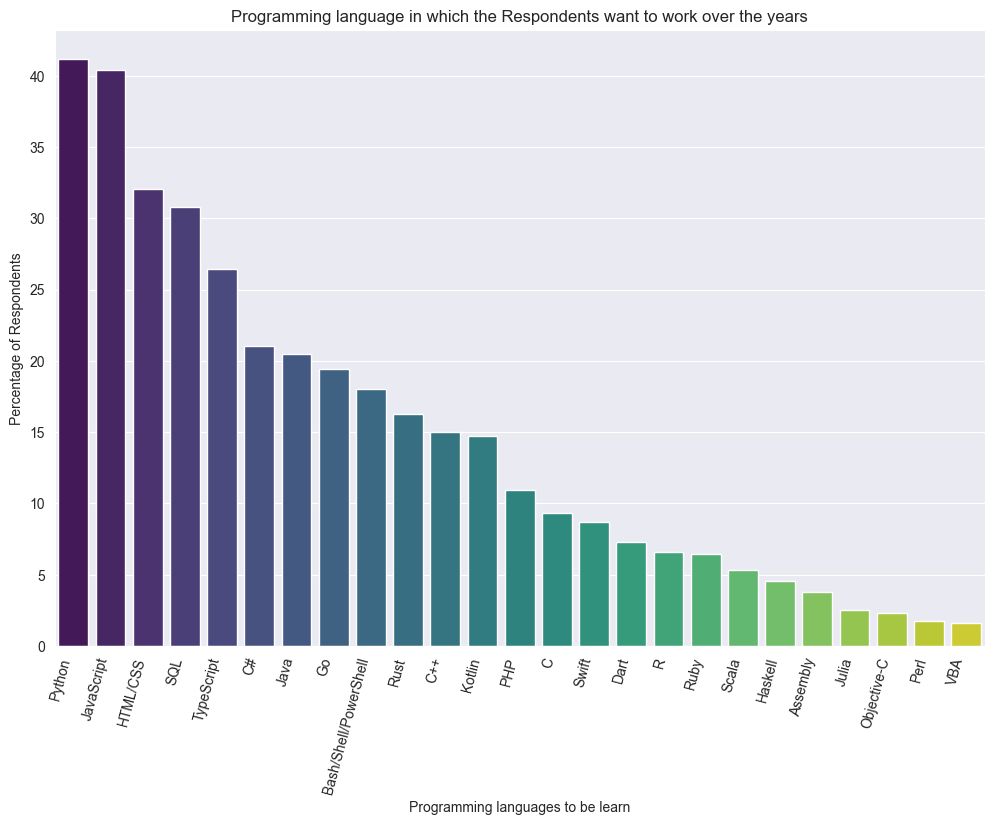

In [63]:
plt.title("Programming language in which the Respondents want to work over the years")
plt.xlabel("Programming languages to be learn")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=75, ha='right')
sns.barplot(x=language_to_learn.index, y=language_to_learn, hue=language_to_learn.index, palette='viridis')